<a href="https://colab.research.google.com/github/temesgen5335/10academy_week0/blob/main/tickpay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tickpay credit engine

In [7]:
!pip install xgboost==2.0.3 scikit-learn==1.5.0 shap==0.46.0 pandas==2.2.2 plaid-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.9/543.9 kB 53.4 MB/s eta 0:00:00
  Created wheel for plaid-python: filename=plaid_python-37.0.0-py3-none-any.whl size=5531335 sha256=6379da282a2c2692594489796177b9f3c6b7cb8cf2f7eab66672fbbcf123dda2
  Stored in directory: /root/.cache/pip/wheels/e3/7e/87/654fa83c56031e5fc68f9d2212496eebd584ea334386da8e71
Successfully built plaid-python
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.0.5
    Uninstalling xgboost-3.0.5:
      Successfully uninstalled xgboost-3.0.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  At

In [13]:
!pip list


Package                                  Version
---------------------------------------- --------------------
absl-py                                  1.4.0
absolufy-imports                         0.3.1
accelerate                               1.10.1
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.0
aiosignal                                1.4.0
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.17.0
altair                                   5.5.0
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                                    4.11.0
anywidget                                0.9.18
argon2-cffi                              25.1.0
argon2-cffi-bindings              

## Data Ingestion

In [6]:
!pip install --upgrade plaid-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for plaid-python: filename=plaid_python-37.0.0-py3-none-any.whl size=5531335 sha256=c529fa87332f34beb0eb9cbf12e47a0236b53c91f500c49958f8b713fae9e2c4
  Stored in directory: /root/.cache/pip/wheels/e3/7e/87/654fa83c56031e5fc68f9d2212496eebd584ea334386da8e71
Successfully built plaid-python
  Attempting uninstall: plaid-python
    Found existing installation: plaid-python 7.0.0
    Uninstalling plaid-python-7.0.0:
      Successfully uninstalled plaid-python-7.0.0


In [14]:
import plaid
package_name = plaid

print(package_name.__version__)


37.0.0


In [15]:
import os
import json
import pandas as pd
from datetime import date, timedelta
from dotenv import load_dotenv

from plaid.api import plaid_api
from plaid.model.item_public_token_exchange_request import ItemPublicTokenExchangeRequest
from plaid.model.transactions_get_request import TransactionsGetRequest
from plaid.model.transactions_get_request_options import TransactionsGetRequestOptions
from plaid.model.transactions_get_response import TransactionsGetResponse
# from plaid.model.date import Date as PlaidDate

from plaid.api import plaid_api
from plaid.model.link_token_create_request import LinkTokenCreateRequest
from plaid.model.link_token_create_request_user import LinkTokenCreateRequestUser
from plaid.model.country_code import CountryCode
from plaid.model.products import Products




In [18]:
import os
from getpass import getpass

# Ask for secrets manually
os.environ["PLAID_CLIENT"] = getpass("Enter your PLAID_CLIENT: ")
os.environ["PLAID_SECRET"] = getpass("Enter your PLAID_SECRET: ")

# Now you can use them
print("clientId:", os.environ["PLAID_CLIENT"])
print("secret:", os.environ["PLAID_SECRET"])


Enter your PLAID_CLIENT: ··········
Enter your PLAID_SECRET: ··········
clientId: 68f25868e30091001f2753a7
secret: cd64c788e7a6bf9f488f35dccaf42cd64c788e7a6bf9f488f35dccaf424


In [ ]:

# --- Configure Plaid API client ---
from plaid import Configuration, ApiClient
from plaid.api import plaid_api

configuration = Configuration(
    host="https://sandbox.plaid.com",
    api_key={
        "clientId": os.environ["PLAID_CLIENT"],
        "secret": os.environ["PLAID_SECRET"]
    }
)

api_client = ApiClient(configuration)
client = plaid_api.PlaidApi(api_client)

print("PLAID_CLIENT set:", bool(os.environ.get("PLAID_CLIENT")))
print("PLAID_SECRET set:", bool(os.environ.get("PLAID_SECRET")))



### link account

In [ ]:
# request = LinkTokenCreateRequest(
#     user=LinkTokenCreateRequestUser(client_user_id='user-id'),
#     client_name='TickPay',
#     products=[Product.AUTH, Product.TRANSACTIONS],
#     country_codes=[CountryCode.US],
#     language='en'
# )

# response = client.link_token_create(request)

example Public key

In [ ]:
from plaid.model.sandbox_public_token_create_request import SandboxPublicTokenCreateRequest

sandbox_request = SandboxPublicTokenCreateRequest(
    institution_id="ins_109508",  # First Platypus Bank (mock)
    initial_products=[Products("transactions")]
)

sandbox_response = client.sandbox_public_token_create(sandbox_request)
public_token = sandbox_response["public_token"]


In [ ]:
exchange_request = ItemPublicTokenExchangeRequest(public_token=public_token)
exchange_response = client.item_public_token_exchange(exchange_request)
access_token = exchange_response["access_token"]


### go on

In [ ]:

# --- Exchange public token for access token ---
public_token = "user-public-token"  # From front-end Link flow

exchange_request = ItemPublicTokenExchangeRequest(public_token=public_token)
exchange_response = client.item_public_token_exchange(exchange_request)
access_token = exchange_response["access_token"]

# --- Fetch transactions from last 30 days ---
start_date = date.from_datetime(date(2025, 9, 17))
end_date = date.from_datetime(date(2025, 10, 17))

transactions_request = TransactionsGetRequest(
    access_token=access_token,
    start_date=start_date,
    end_date=end_date,
    options=TransactionsGetRequestOptions(count=500, offset=0)
)

transactions_response: TransactionsGetResponse = client.transactions_get(transactions_request)

# --- Convert transactions to DataFrame ---
transactions = transactions_response["transactions"]
df = pd.DataFrame([txn.to_dict() for txn in transactions])

# --- Save to CSV ---
df.to_csv("transactions.csv", index=False)

# --- Save mock biometric data ---
biometric_features = {
    "face_confidence": 0.95,
    "keystroke_variance": 0.12
}
with open("biometrics.json", "w") as f:
    json.dump(biometric_features, f)

print("Transactions and biometrics saved.")


## simulate using mock data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def generate_mock_transactions(n=100, start_date="2025-08-01"):
    start = datetime.strptime(start_date, "%Y-%m-%d")
    transactions = []

    for _ in range(n):
        tx_date = start + timedelta(days=np.random.randint(0, 60))
        transactions.append({
            "date": tx_date.strftime("%Y-%m-%d"),
            "name": np.random.choice(["Uber", "Amazon", "Whole Foods", "Netflix", "Stripe"]),
            "amount": round(np.random.normal(50, 20), 2),
            "category": np.random.choice(["Transportation", "Shopping", "Groceries", "Entertainment", "Business"]),
            "type": np.random.choice(["debit", "credit"]),
            "location_confidence": round(np.random.uniform(0.7, 1.0), 2)
        })

    return pd.DataFrame(transactions)

mock_tx = generate_mock_transactions()
mock_tx.to_csv("mock_transactions.csv", index=False)
mock_tx.head()


,date,name,amount,category,type,location_confidence
0,2025-09-23,Amazon,38.96,Transportation,credit,0.87
1,2025-08-26,Amazon,49.19,Business,debit,0.93
2,2025-08-14,Stripe,68.48,Transportation,credit,0.91
3,2025-09-27,Whole Foods,72.49,Business,credit,0.95
4,2025-09-03,Whole Foods,53.74,Transportation,credit,0.95


In [2]:
import json

biometric_data = {
    "face_match_confidence": 0.93,
    "keystroke_variance": 0.18,
    "mouse_movement_entropy": 0.78
}

with open("mock_biometrics.json", "w") as f:
    json.dump(biometric_data, f)


In [3]:
# Biometric mock (extend with OpenCV for face, pyautogui for keystroke)
biometric_features = {'face_confidence': 0.95, 'keystroke_variance': 0.12}  # From device API
with open('biometrics.json', 'w') as f: json.dump(biometric_features, f)

feature engineering

df majority:          date         name  amount        category    type  \
0  2025-09-23       Amazon   38.96  Transportation  credit   
2  2025-08-14       Stripe   68.48  Transportation  credit   
3  2025-09-27  Whole Foods   72.49        Business  credit   
4  2025-09-03  Whole Foods   53.74  Transportation  credit   
5  2025-08-20       Amazon    5.24  Transportation  credit   
..        ...          ...     ...             ...     ...   
95 2025-09-14       Amazon   74.38   Entertainment   debit   
96 2025-08-11       Stripe   41.62        Shopping   debit   
97 2025-08-11         Uber   39.16       Groceries   debit   
98 2025-08-28       Stripe   33.27        Business   debit   
99 2025-09-22  Whole Foods   42.71        Shopping  credit   

    location_confidence  debt_ratio  velocity  behavior_score  \
0                  0.87    0.000779       0.0        0.024952   
2                  0.91    0.003133     -12.0        0.704624   
3                  0.95    0.004582      44.0  

['../models/shap_explainer.pkl']

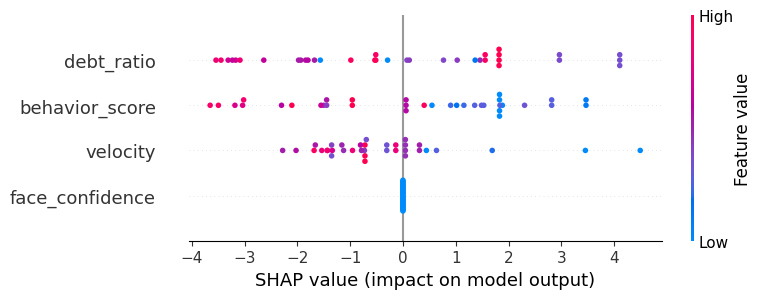

In [6]:

# ~/agents/scoring_model.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import shap
import joblib
import os

# Load & engineer (mock behavioral; real: from Kafka)
df = pd.read_csv('mock_transactions.csv')
df['date'] = pd.to_datetime(df['date'])

# Feature engineering
df['debt_ratio'] = df['amount'].rolling(10, min_periods=1).sum() / 50000
df['velocity'] = df['date'].diff().dt.days.fillna(0)
df['behavior_score'] = np.random.uniform(0, 1, len(df))

# Load biometrics
biometrics = pd.read_json('biometrics.json', typ='series').to_frame().T.reindex(df.index, fill_value=0)
df = pd.concat([df, biometrics], axis=1)

# Labels
df['default'] = np.random.binomial(1, 0.1, len(df))  # ~10% default

# Balance the data
df_majority = df[df.default == 0]
print("df majority:", df_majority)
df_minority = df[df.default == 1]
print("df minority", df_minority)


df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Define features/labels
X = df_balanced[['debt_ratio', 'velocity', 'behavior_score', 'face_confidence']]
y = df_balanced['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train new model from scratch
model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='auc')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}, AUC: {roc_auc_score(y_test, y_proba):.3f}')

# SHAP explainability
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, show=False)  # Save manually if needed

# Save model
os.makedirs("../models", exist_ok=True)
joblib.dump(model, '../models/credit_model.pkl')
joblib.dump(explainer, '../models/shap_explainer.pkl')


### annomaly detection model
(Isolation Forest; integrate with Kafka consumer):

In [39]:
!pip install kafka-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 17.1 MB/s eta 0:00:00


In [8]:
# ~/tickpay/risk_engine.py
from sklearn.ensemble import IsolationForest
from kafka import KafkaConsumer
import joblib
import numpy as np

# Train on historical (mock)
data = np.random.rand(1000, 4)  # [amount, time, loc_hash, velocity]
model = IsolationForest(contamination=0.1)
model.fit(data)
joblib.dump(model, 'anomaly_model.pkl')

# Real-time consumer
consumer = KafkaConsumer('bnpl_events', bootstrap_servers='localhost:9092')
for msg in consumer:
    event = json.loads(msg.value)
    features = np.array([[event['amount'], time.time(), hash(event['location']), event.get('velocity',0)]])
    anomaly_score = model.decision_function(features)[0]
    if anomaly_score < 0:  # Fraud
        print("Fraud alert!")
    # Dynamic limit: RL stub (extend with stable-baselines3 PPO)
    limit = 1000 * (1 + anomaly_score)  # Adjust based on score

ModuleNotFoundError: No module named 'kafka'

offline: without kafka

In [9]:
# ~/tickpay/risk_engine.py

import joblib
import numpy as np
import time
import json
from sklearn.ensemble import IsolationForest

# 1. Train anomaly detection model on mock historical data
data = np.random.rand(1000, 4)  # Columns: [amount, timestamp, location_hash, velocity]
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(data)
joblib.dump(model, 'anomaly_model.pkl')

print("[✓] Anomaly model trained and saved as 'anomaly_model.pkl'.")

# 2. Simulate real-time BNPL events (replace with real API or stream later)
mock_events = [
    {"amount": 100, "location": "Nairobi", "velocity": 2},
    {"amount": 5000, "location": "Mogadishu", "velocity": 0},
    {"amount": 50, "location": "Addis Ababa", "velocity": 5},
    {"amount": 9999, "location": "Dubai", "velocity": 1},
]

# 3. Load model for runtime use
model = joblib.load('anomaly_model.pkl')

# 4. Simulate risk checks
for event in mock_events:
    features = np.array([
        [
            event['amount'],
            time.time(),  # simulate event timestamp
            hash(event['location']) % 100000,  # location as numeric hash
            event.get('velocity', 0)
        ]
    ])

    anomaly_score = model.decision_function(features)[0]

    print(f"[Risk Check] Event: {event}")
    print(f"  Anomaly Score: {anomaly_score:.4f}")

    if anomaly_score < 0:
        print("  ⚠️  Potential Fraud Detected!")

    # Mock dynamic credit limit logic
    limit = 1000 * (1 + anomaly_score)
    print(f"  Adjusted BNPL limit: ${max(0, round(limit, 2))}")
    print("—" * 40)


[✓] Anomaly model trained and saved as 'anomaly_model.pkl'.
[Risk Check] Event: {'amount': 100, 'location': 'Nairobi', 'velocity': 2}
  Anomaly Score: -0.0746
  ⚠️  Potential Fraud Detected!
  Adjusted BNPL limit: $925.42
————————————————————————————————————————
[Risk Check] Event: {'amount': 5000, 'location': 'Mogadishu', 'velocity': 0}
  Anomaly Score: -0.1028
  ⚠️  Potential Fraud Detected!
  Adjusted BNPL limit: $897.17
————————————————————————————————————————
[Risk Check] Event: {'amount': 50, 'location': 'Addis Ababa', 'velocity': 5}
  Anomaly Score: -0.0746
  ⚠️  Potential Fraud Detected!
  Adjusted BNPL limit: $925.42
————————————————————————————————————————
[Risk Check] Event: {'amount': 9999, 'location': 'Dubai', 'velocity': 1}
  Anomaly Score: -0.0746
  ⚠️  Potential Fraud Detected!
  Adjusted BNPL limit: $925.42
————————————————————————————————————————


In [10]:
import json
import time
import numpy as np
import joblib

model = joblib.load('anomaly_model.pkl')

for _ in range(10):
    event = {
        "amount": np.random.uniform(10, 1000),
        "location": "NY",
        "velocity": np.random.uniform(0.1, 2.0)
    }
    features = np.array([[event['amount'], time.time(), hash(event['location']), event['velocity']]])
    anomaly_score = model.decision_function(features)[0]
    print("Score:", anomaly_score)
    if anomaly_score < 0:
        print("⚠️ Fraud alert")


Score: -0.05653515877495929
⚠️ Fraud alert
Score: -0.054753462535081954
⚠️ Fraud alert
Score: -0.07457982259713969
⚠️ Fraud alert
Score: -0.05592029075102378
⚠️ Fraud alert
Score: -0.07457982259713969
⚠️ Fraud alert
Score: -0.058098088215238985
⚠️ Fraud alert
Score: -0.07457982259713969
⚠️ Fraud alert
Score: -0.07457982259713969
⚠️ Fraud alert
Score: -0.056547135447014285
⚠️ Fraud alert
Score: -0.052736316494281454
⚠️ Fraud alert


merchantless bnpl

In [4]:
!pip install stripe uuid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 51.1 MB/s eta 0:00:00


In [5]:
# ~/tickpay/bnpl_card.py
import stripe
import uuid
import os

# Use mock key during dev
stripe.api_key = os.getenv("STRIPE_SECRET_KEY", "sk_test_mock_key")

# -- MOCK MODE SWITCH --
MOCK_MODE = True  # Set to False when using real Stripe Issuing

def create_cardholder(user_id, email):
    if MOCK_MODE:
        return {"id": f"mock_cardholder_{user_id}"}
    return stripe.Issuing.Cardholder.create(
        type="individual",
        name=f"User {user_id}",
        email=email,
        billing={"address": {
            "line1": "123 Main St",
            "city": "NYC",
            "state": "NY",
            "country": "US",
            "postal_code": "10001"
        }},
    )

def create_virtual_card(user_id, limit_usd, email="user@example.com"):
    cardholder = create_cardholder(user_id, email)

    if MOCK_MODE:
        return {
            "card_id": str(uuid.uuid4()),
            "cardholder_id": cardholder["id"],
            "limit": limit_usd,
            "status": "mock_issued",
            "expiry": "12/29",
            "brand": "Visa",
            "token": f"mock_token_{uuid.uuid4().hex[:6]}"
        }

    card = stripe.Issuing.Card.create(
        cardholder=cardholder["id"],
        currency="usd",
        type="virtual",
        spending_controls={
            "spending_limits": [{
                "amount": int(limit_usd * 100),  # in cents
                "interval": "daily"
            }]
        }
    )
    return {
        "card_id": card.id,
        "cardholder_id": cardholder["id"],
        "limit": limit_usd,
        "status": card.status,
        "expiry": f"{card.exp_month}/{card.exp_year}",
        "brand": card.brand
        # ⚠️ You won't get PAN/card number — use card.id securely
    }

# Example usage (mock)
if __name__ == "__main__":
    card_info = create_virtual_card(user_id=123, limit_usd=500)
    print("BNPL Virtual Card Issued:", card_info)


BNPL Virtual Card Issued: {'card_id': 'cdc6410f-c422-4f35-8037-6b1cd9fbfb2a', 'cardholder_id': 'mock_cardholder_123', 'limit': 500, 'status': 'mock_issued', 'expiry': '12/29', 'brand': 'Visa', 'token': 'mock_token_0e5f13'}


In [6]:
# tickpay/checkout.py
def process_bnpl_payment(amount_cents, mock_token):
    if MOCK_MODE:
        print(f"[MOCK] Processed ${amount_cents / 100} using token {mock_token}")
        return {"status": "success", "tx_id": str(uuid.uuid4())}
    else:
        return stripe.PaymentIntent.create(
            amount=amount_cents,
            currency='usd',
            payment_method=mock_token,  # moke token
            confirm=True
        )


Repayment

In [16]:
# pip install prophet transformers
!pip install wheel
!apt-get install -y build-essential


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [19]:
# ~/tickpay/repayment.py
from prophet import Prophet
import pandas as pd
from transformers import pipeline

# 1. Load historical repayment data
df = pd.read_csv('repayment.csv')  # [ds, y]
df['ds'] = pd.to_datetime(df['ds'])  # Ensure datetime

# 2. Train Prophet model
m = Prophet()
m.fit(df)

# 3. Predict next 30 days
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
print("Repayment forecast:")
print(forecast[['ds', 'yhat']].tail())

# 4. NLP intent classification (e.g. from chat/sms/email)
classifier = pipeline('sentiment-analysis')
query = "I can't pay this week"
intent = classifier(query)[0]['label']  # Usually POSITIVE or NEGATIVE

# 5. Mock response handling
if intent == "NEGATIVE":
    print("AI Response: We understand! Would you like to delay or split your payment?")
else:
    print("AI Response: Great! You're on track to repay as scheduled.")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb00ct94d/n7kyhz0g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb00ct94d/8kddximc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49908', 'data', 'file=/tmp/tmpb00ct94d/n7kyhz0g.json', 'init=/tmp/tmpb00ct94d/8kddximc.json', 'output', 'file=/tmp/tmpb00ct94d/prophet_model3afyrh6b/prophet_model-20251018101533.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:15:33 - cmdstanpy - INFO - Chain [1] start processing
IN

Repayment forecast:
           ds      yhat
35 2025-10-06  0.525320
36 2025-10-07  0.519611
37 2025-10-08  0.513902
38 2025-10-09  0.508193
39 2025-10-10  0.502484


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


AI Response: We understand! Would you like to delay or split your payment?
